<h1><b>MACHINE LEARNING AND STATISTICS: REGRESSION</b></h1>

<h2>GOALS OF THIS PROJECT</h2>
    <ol>
    <li>Show how scipy can be used to perform linear regression.</li>
    <li>Find an appropriate data set online or elsewhere on which to
perform linear regression.
</li>
    <li>Demonstrate how to perform linear regression on the data set.
</li>
</ol>

<h2 align = "center">1. PERFORMING LINEAR REGRESSION WITH SCIPY</h2>

<h3>WHAT IS LINEAR REGRESSION</h3>
<p>Linear regression is a commonly used type of predicitive analysis. It attempts to examine two things.
    <ol>
        <li>Whether a set of predictor variables can predict the outcome/dependent variable. For example predicting the weight of a mouse based on its size.</li>
        <li>Which variables in particular are significant predictors of the outcome variable. For example, a mouse's tail length may not be significant in predicting is size or weight.</li>

In [7]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as ss

import pandas as pd

rng = np.random.default_rng()

In [8]:
x = rng.random(10)

y = 1.6*x + rng.random(10)

In [9]:
res = ss.linregress(x, y)

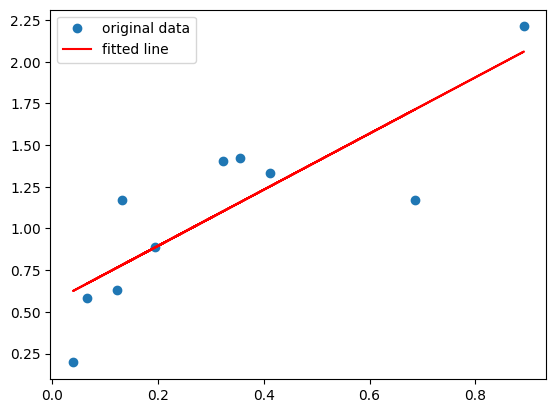

In [10]:
plt.plot(x, y, 'o', label='original data')

plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

plt.legend()

plt.show()

<h2 align = "center">2. EXPLAINING THE DATA SET USED</h2>

In [11]:
df = pd.read_csv('Iris.csv')

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
def dfregression(x,y):
    res = ss.linregress(x, y)

    plt.plot(x, y, 'o', label='original data')

    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

    plt.legend()

    plt.show()

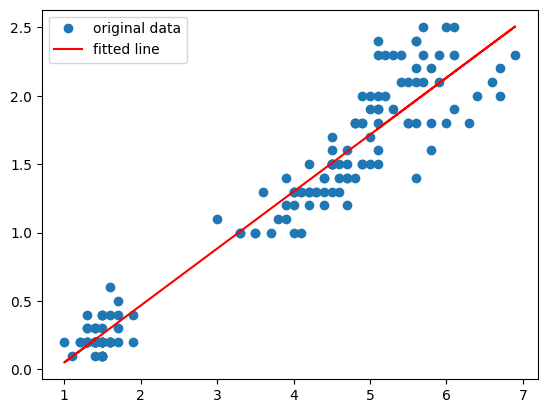

In [13]:
dfregression(df['PetalLengthCm'], df['PetalWidthCm'])

In [14]:
dfsetosa = df[df['Species'] == 'Iris-setosa']
dfvirginica = df[df['Species'] == 'Iris-virginica']
dfversicolor = df[df['Species'] == 'Iris-versicolor']

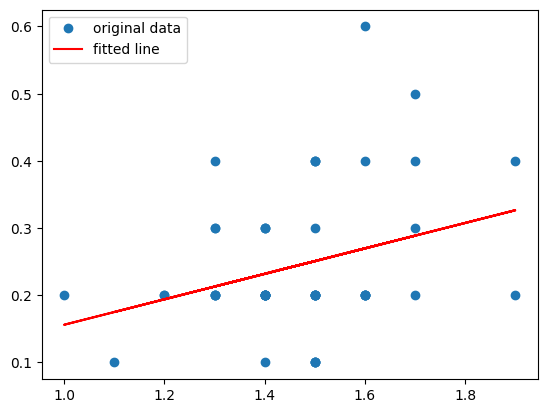

In [15]:
dfregression(dfsetosa['PetalLengthCm'], dfsetosa['PetalWidthCm'])

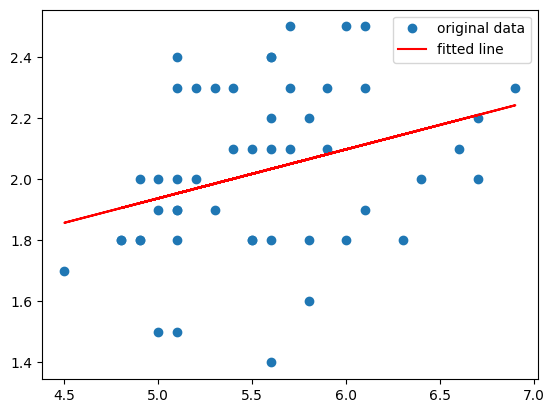

In [16]:
dfregression(dfvirginica['PetalLengthCm'], dfvirginica['PetalWidthCm'])

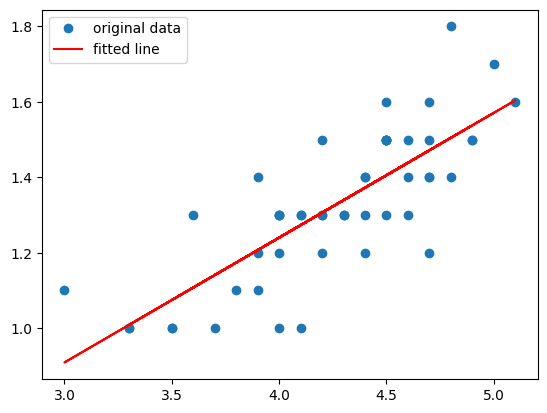

In [17]:
dfregression(dfversicolor['PetalLengthCm'], dfversicolor['PetalWidthCm'])

In [18]:
def loss_function(m, b, points):
    total_error = 0 
    for i in range(len(points)):
        x = points.iloc[i].PetalLengthCm
        y = points.iloc[i].PetalWidthCm
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

In [19]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].PetalLengthCm
        y = points.iloc[i].PetalWidthCm
        
        m_gradient +=-(2/n) * x * (y - (m_now * x + b_now))
        b_gradient +=-(2/n) * (y - (m_now * x + b_now))
    m = m_now - m_gradient * L
    b = b_now = b_gradient * L
    return m,b


In [20]:
m = 0
b = 0
L = 0.001
epochs = 1000

for i in range(epochs):
    m,b = gradient_descent(m, b, df, L)

print(m,b)

0.3363901490182314 0.00013168692072784024


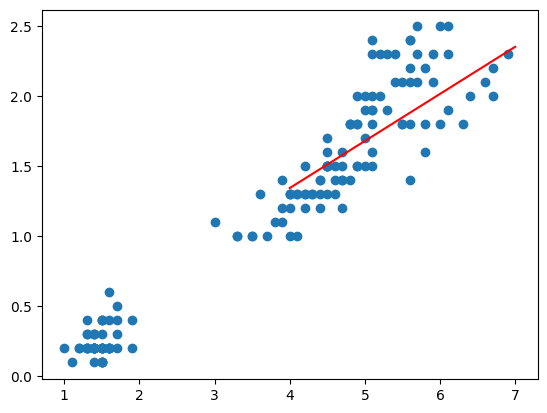

In [22]:
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)
plt.plot(list(range(4,8)), [m* x + b for x in range(4,8)],color = "red")

<h2 align = "center">3. PERFORMING LINEAR REGRESSION THE DATA SET</h2>